In [232]:
import pandas as pd

In [233]:
emotions = [
    'fear',
    'anger',
    'surprise',
    'sadness',
    'disgust',
    'joy',
    'hope',
    'neutral'
]

In [234]:
preds = {}
for emotion in emotions:
	preds[emotion] = pd.read_csv(f'./dataset_binary/predictions/{emotion}.tsv', sep='\t', header=None)
n_samples = len(preds['sadness'])

dev_lbl = pd.read_csv('./datasets/WASSA23_essay_level_dev_preproc.tsv', sep='\t')['emotion'].tolist()

In [235]:
preds_list = []
for i in range(n_samples):
    emos = []
    for emotion in emotions:
        if preds[emotion][0].loc[i]==emotion:
            emos.append(emotion)
    preds_list.append(emos)

preds_str=[]
for pred in preds_list:
    str=''
    for i, emo in enumerate(pred):
        if i==len(pred)-1:
            str+=emo
        else:
            str+=emo+'/'
    preds_str.append(str)
preds_str


['sadness',
 'sadness',
 'sadness',
 '',
 'sadness',
 'sadness',
 '',
 'sadness',
 '',
 '',
 '',
 'neutral',
 'anger',
 '',
 'sadness',
 'sadness',
 'sadness',
 'disgust',
 '',
 'neutral',
 'sadness',
 'sadness',
 '',
 'sadness',
 'sadness',
 'sadness',
 '',
 'sadness',
 '',
 '',
 'sadness',
 'anger',
 '',
 'fear',
 'joy',
 'sadness',
 'sadness',
 '',
 'anger',
 'sadness',
 '',
 'sadness',
 'sadness',
 'sadness',
 'sadness',
 'sadness',
 '',
 'disgust',
 '',
 'sadness',
 '',
 'sadness',
 'sadness',
 'disgust',
 'fear/neutral',
 'anger',
 'sadness',
 'fear',
 'sadness',
 '',
 'anger',
 'anger/sadness',
 'sadness',
 '',
 'sadness',
 'neutral',
 'neutral',
 'sadness',
 'sadness',
 'sadness',
 'anger',
 'sadness',
 'sadness',
 '',
 '',
 'anger',
 'neutral',
 'sadness',
 'disgust',
 'sadness',
 'sadness',
 'sadness',
 'disgust',
 'disgust',
 'fear/sadness',
 'fear/sadness',
 'sadness',
 'anger',
 'sadness',
 '',
 'anger',
 'disgust',
 'neutral',
 '',
 'anger/disgust',
 '',
 'fear',
 'anger'

In [236]:
ctr=0
for pred in preds_list:
    if len(pred)>1:
        ctr+=1
print(ctr)

20


In [237]:
for pred, true in zip(preds_str, dev_lbl):
	print(f'{pred}, {true}')

sadness, sadness
sadness, sadness
sadness, sadness
, neutral
sadness, sadness
sadness, sadness
, neutral
sadness, sadness
, sadness
, neutral
, sadness
neutral, neutral
anger, anger
, hope/neutral
sadness, sadness
sadness, sadness
sadness, sadness
disgust, disgust
, sadness
neutral, neutral
sadness, fear/sadness
sadness, hope/sadness
, anger
sadness, sadness
sadness, sadness
sadness, sadness
, disgust
sadness, sadness
, anger
, anger/disgust
sadness, sadness
anger, anger/neutral
, sadness
fear, neutral
joy, neutral
sadness, hope/sadness
sadness, sadness
, disgust
anger, neutral
sadness, neutral
, fear
sadness, neutral/sadness
sadness, sadness/surprise
sadness, sadness
sadness, sadness
sadness, sadness
, anger
disgust, anger/disgust
, neutral
sadness, sadness
, neutral
sadness, sadness
sadness, sadness
disgust, anger/disgust
fear/neutral, neutral
anger, neutral
sadness, sadness
fear, sadness
sadness, hope
, hope/sadness
anger, anger
anger/sadness, sadness
sadness, sadness
, joy
sadness,

In [238]:
from utils import compute_metrics
scores = compute_metrics(dev_lbl, preds_str, "EMO")
scores

c:\Users\giuli\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:895: UserWarning: unknown class(es) [''] will be ignored
  warnings.warn(


{'macro_f1': 0.3794,
 'micro_f1': 0.6176,
 'micro_jaccard': 0.4467,
 'macro_precision': 0.4373,
 'macro_recall': 0.3637,
 'micro_precision': 0.7429,
 'micro_recall': 0.5285}

In [239]:
logits_df = pd.DataFrame()
for emotion in emotions:
    logit = pd.read_csv(f'./dataset_binary/logits/logits_{emotion}.tsv')
    logits_df[emotion] = (logit[f'no-{emotion}'] + logit[emotion] - 0.5).tolist()
logits_df

,fear,anger,surprise,sadness,disgust,joy,hope,neutral
0,-0.494536,-0.407202,-0.583641,-0.562369,-0.480437,-0.506987,-0.547754,-0.536931
1,-0.489842,-0.412878,-0.613541,-0.456550,-0.442765,-0.532474,-0.541169,-0.559709
2,-0.495759,-0.405055,-0.564010,-0.501943,-0.476336,-0.525681,-0.554068,-0.523637
3,-0.501696,-0.399005,-0.682127,-0.478255,-0.461079,-0.528920,-0.580923,-0.517579
4,-0.511346,-0.405602,-0.560721,-0.558665,-0.478959,-0.550218,-0.541957,-0.528266
...,...,...,...,...,...,...,...,...
203,-0.431560,-0.410137,-0.548627,-0.522740,-0.450733,-0.558613,-0.519598,-0.577776
204,-0.508904,-0.404790,-0.564122,-0.602938,-0.482949,-0.540833,-0.555277,-0.527882
205,-0.534702,-0.405044,-0.603539,-0.476945,-0.501007,-0.537009,-0.550371,-0.402117
206,-0.500915,-0.407830,-0.563245,-0.529514,-0.498139,-0.516272,-0.520820,-0.546265


In [240]:
for i, pred in enumerate(preds_str):
    if pred == "":
        #preds_str[i] = f"{preds_dev[0].loc[i]}/neutral"
        preds_str[i] = emotions[np.argmax(logits_df.loc[i].tolist())]

In [241]:
preds_dev = pd.read_csv('./dataset_binary/predictions_EMO_dev.tsv', header=None)
preds_dev

,0
0,sadness
1,sadness
2,joy
3,neutral
4,sadness
...,...
203,sadness
204,sadness
205,neutral
206,fear


In [242]:
new_scores = compute_metrics(dev_lbl, preds_str, "EMO")
new_scores

{'macro_f1': 0.3917,
 'micro_f1': 0.6329,
 'micro_jaccard': 0.463,
 'macro_precision': 0.4039,
 'macro_recall': 0.4093,
 'micro_precision': 0.6579,
 'micro_recall': 0.6098}

In [243]:
from utils import plot_confusion_matrix, plot_confusion_matrix_per_emotions

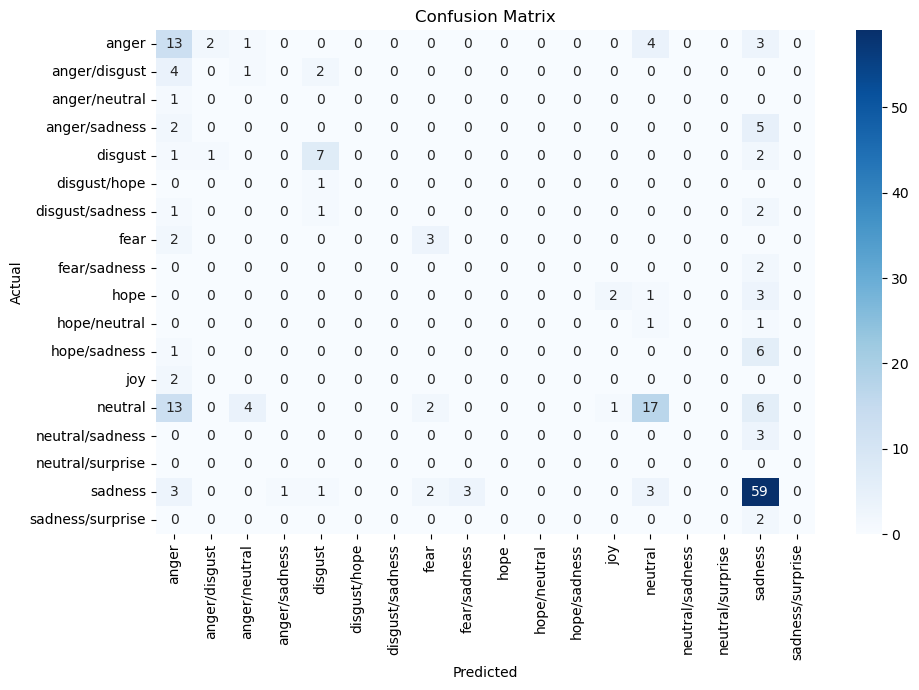

In [244]:
plot_confusion_matrix(dev_lbl, preds_str, title=None, path=None)

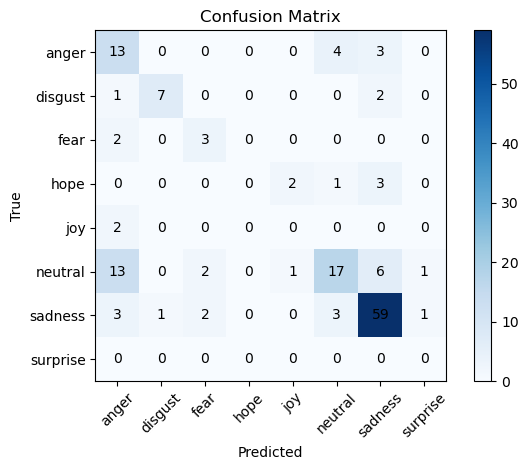

In [245]:
plot_confusion_matrix_per_emotions(dev_lbl, preds_str, title = None, path = None)